In [13]:
import numpy as np
import pandas


In [24]:
english = pandas.read_csv("train_cap2018.csv")

english.head()

,fulltext,sentences,words,letters.all,syllables,punct,avg.sentc.length,avg.word.length,avg.syll.word,sntc.per.word,...,Maas lgV0,MATTR,MSTTR,MTLD,Root TTR,Summer,TTR.1,Uber index,Yule's K,level1
0,\r\r\n The Eiffel Tower The Eiffel Tower ...,16,233,1116,363,32,14.562500,4.789700,1.557940,0.068670,...,4.96,0.72,0.70,70.74,8.98,0.88,0.59,24.30,146.62,C2
1,\r\r\n The Court Green burglar arrested A...,7,180,866,268,18,25.714286,4.811111,1.488889,0.038889,...,5.07,0.74,0.76,107.12,8.57,0.89,0.64,26.14,141.98,C2
2,\r\r\n Thank you for giving us the opport...,10,180,861,269,20,18.000000,4.783333,1.494444,0.055556,...,5.99,0.77,0.78,161.93,9.62,0.92,0.72,35.15,62.96,C2
3,\r\r\n The international AI conference ca...,10,180,872,281,20,18.000000,4.844444,1.561111,0.055556,...,5.49,0.77,0.81,141.10,9.09,0.90,0.68,30.11,70.99,C2
4,\r\r\n I believe that the creative writin...,11,187,849,283,29,17.000000,4.540107,1.513369,0.058824,...,4.61,0.68,0.64,70.69,7.97,0.87,0.58,22.02,124.11,C2


In [51]:
col = ['sentences', 'level1']
english = english[col]
english.head()

english['level_id'] = english['level1'].factorize()[0]

category_id_df = english[['level1', 'level_id']].drop_duplicates().sort_values('level_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['level_id', 'level1']].values)

english[:51]

,sentences,level1,level_id
0,16,C2,0
1,7,C2,0
2,10,C2,0
3,10,C2,0
4,11,C2,0
5,9,C2,0
6,5,C2,0
7,9,C2,0
8,11,C2,0
9,9,C2,0


level1
A1    11361
A2     7688
B1     5383
B2     2337
C1      491
C2       50
Name: sentences, dtype: int64
(6,)
11361


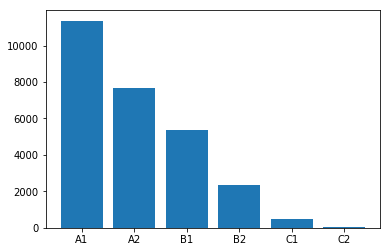

In [84]:
import matplotlib.pyplot as plt
fig = plt.figure()
print(english.groupby('level1').sentences.count())
print(english.groupby('level1').sentences.count().shape)
y = english.groupby('level1').sentences.count()
print(y["A1"])
plt.bar(y.keys(), y.values)
plt.show()